In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(DESeq2)
library(DiffBind)
library(tidyr)
library(wesanderson)
library(viridis)
library(gplots)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter,

In [2]:
setwd("/lustre1/project/stg_00041/Adrian/AJ_0075_XCU_SONG_DATA/ATAC_seq/")

In [3]:
song_mesc_atac <- read.csv("AJ_0075_ATAC_XX_XY_allelic_data_norm.csv")

In [4]:
head(song_mesc_atac)

X,cell_type,total_reads_per_sample,region_id,seqnames,start,end,accessibility_genome1,accessibility_genome2,sumReads,acc_gen1_norm,acc_gen2_norm,sumReads_norm
1,CM1,4988564,1,chr1,3008518,3008729,1,1,2,0.01984758,0.01984758,0.03930888
2,CM1,4988564,2,chr1,3012678,3012785,1,1,2,0.01984758,0.01984758,0.03930888
3,CM1,4988564,3,chr1,3027133,3027524,1,3,4,0.01984758,0.05839866,0.07713084
4,CM1,4988564,4,chr1,3035676,3035918,4,1,5,0.07713084,0.01984758,0.09551856
5,CM1,4988564,5,chr1,3062439,3062745,11,5,16,0.19926416,0.09551856,0.27818733
6,CM1,4988564,6,chr1,3062895,3063027,2,1,3,0.03930888,0.01984758,0.05839866


In [5]:
names(song_mesc_atac)[names(song_mesc_atac) == 'seqnames'] <- 'chr'

In [6]:
head(song_mesc_atac)

X,cell_type,total_reads_per_sample,region_id,chr,start,end,accessibility_genome1,accessibility_genome2,sumReads,acc_gen1_norm,acc_gen2_norm,sumReads_norm
1,CM1,4988564,1,chr1,3008518,3008729,1,1,2,0.01984758,0.01984758,0.03930888
2,CM1,4988564,2,chr1,3012678,3012785,1,1,2,0.01984758,0.01984758,0.03930888
3,CM1,4988564,3,chr1,3027133,3027524,1,3,4,0.01984758,0.05839866,0.07713084
4,CM1,4988564,4,chr1,3035676,3035918,4,1,5,0.07713084,0.01984758,0.09551856
5,CM1,4988564,5,chr1,3062439,3062745,11,5,16,0.19926416,0.09551856,0.27818733
6,CM1,4988564,6,chr1,3062895,3063027,2,1,3,0.03930888,0.01984758,0.05839866


In [7]:
unique(song_mesc_atac$total_reads_per_sample)

[1] 4988564 4099695 6985349 4268510

In [8]:
song_mesc_atac$cell_type <- factor(song_mesc_atac$cell_type, levels=c('CM1', 'CM2', 'CM3', 'CM7'))

In [9]:
nrow(song_mesc_atac)

[1] 1632440

In [10]:
song_mesc_atac$mus_norm <- log1p((song_mesc_atac$accessibility_genome1/song_mesc_atac$total_reads_per_sample)*10000)

In [15]:
song_mesc_atac$cast_norm <- log1p((song_mesc_atac$accessibility_genome2/song_mesc_atac$total_reads_per_sample)*10000)

In [16]:
head(song_mesc_atac)

X,cell_type,total_reads_per_sample,region_id,chr,start,end,accessibility_genome1,accessibility_genome2,sumReads,acc_gen1_norm,acc_gen2_norm,sumReads_norm,mus_norm,cast_norm
1,CM1,4988564,1,chr1,3008518,3008729,1,1,2,0.01984758,0.01984758,0.03930888,0.002002578,0.002002578
2,CM1,4988564,2,chr1,3012678,3012785,1,1,2,0.01984758,0.01984758,0.03930888,0.002002578,0.002002578
3,CM1,4988564,3,chr1,3027133,3027524,1,3,4,0.01984758,0.05839866,0.07713084,0.002002578,0.005995744
4,CM1,4988564,4,chr1,3035676,3035918,4,1,5,0.07713084,0.01984758,0.09551856,0.007986363,0.002002578
5,CM1,4988564,5,chr1,3062439,3062745,11,5,16,0.19926416,0.09551856,0.27818733,0.021810839,0.009973028
6,CM1,4988564,6,chr1,3062895,3063027,2,1,3,0.03930888,0.01984758,0.05839866,0.004001154,0.002002578


In [17]:
song_mesc_atac_X <- song_mesc_atac[ which(song_mesc_atac$chr=='chrX' & song_mesc_atac$sumReads >= 10),]

song_mesc_atac_A <- song_mesc_atac[ which(song_mesc_atac$chr!= "chrX" & song_mesc_atac$chr!= "chrY" &  song_mesc_atac$sumReads >= 10),]

In [18]:
song_mesc_atac_A$chr <- 'Auto'

In [19]:
head(song_mesc_atac_X)
head(song_mesc_atac_A)

,X,cell_type,total_reads_per_sample,region_id,chr,start,end,accessibility_genome1,accessibility_genome2,sumReads,acc_gen1_norm,acc_gen2_norm,sumReads_norm,mus_norm,cast_norm
400951,400951,CM1,4988564,400951,chrX,5435757,5435959,10,13,23,0.18270356,0.23158465,0.3791585,0.019847576,0.025725838
400952,400952,CM1,4988564,400952,chrX,5436194,5436420,6,10,16,0.11357427,0.18270356,0.2781873,0.011955754,0.019847576
400953,400953,CM1,4988564,400953,chrX,5467900,5468056,3,7,10,0.05839866,0.13130975,0.1827036,0.005995744,0.013934556
400956,400956,CM1,4988564,400956,chrX,5925868,5926228,16,11,27,0.27818733,0.19926416,0.4325859,0.031569748,0.021810839
400961,400961,CM1,4988564,400961,chrX,6081829,6082130,7,3,10,0.13130975,0.05839866,0.1827036,0.013934556,0.005995744
400962,400962,CM1,4988564,400962,chrX,6083257,6083513,13,11,24,0.23158465,0.19926416,0.3927853,0.025725838,0.021810839


,X,cell_type,total_reads_per_sample,region_id,chr,start,end,accessibility_genome1,accessibility_genome2,sumReads,acc_gen1_norm,acc_gen2_norm,sumReads_norm,mus_norm,cast_norm
5,5,CM1,4988564,5,Auto,3062439,3062745,11,5,16,0.19926416,0.09551856,0.2781873,0.021810839,0.009973028
29,29,CM1,4988564,29,Auto,3483005,3483431,38,31,69,0.56630324,0.48330312,0.8684288,0.073412368,0.060287748
40,40,CM1,4988564,40,Auto,3549564,3549737,5,22,27,0.09551856,0.36534334,0.4325859,0.009973028,0.043156101
41,41,CM1,4988564,41,Auto,3549987,3550219,6,13,19,0.11357427,0.23158465,0.3227146,0.011955754,0.025725838
50,50,CM1,4988564,50,Auto,3670543,3670681,7,4,11,0.13130975,0.07713084,0.1992642,0.013934556,0.007986363
51,51,CM1,4988564,51,Auto,3671409,3671667,13,23,36,0.23158465,0.37915845,0.5432835,0.025725838,0.045074175


In [59]:
song_mesc_atac_X_A <- rbind(song_mesc_atac_A, song_mesc_atac_X)

In [60]:
female_mESCs_CM2 <- subset(song_mesc_atac_X_A, cell_type == 'CM2')
male_mESCs_CM7 <- subset(song_mesc_atac_X_A, cell_type == 'CM7')
female_mESCs_CM1 <- subset(song_mesc_atac_X_A, cell_type == 'CM1')
male_mESCs_CM3 <- subset(song_mesc_atac_X_A, cell_type == 'CM3')

In [61]:
unique(male_mESCs_CM7$chr)

[1] "Auto" "chrX"

In [62]:
head(male_mESCs_CM7)

,X,cell_type,total_reads_per_sample,region_id,chr,start,end,accessibility_genome1,accessibility_genome2,sumReads,acc_gen1_norm,acc_gen2_norm,sumReads_norm,mus_norm
1224335,1224335,CM7,4268510,5,Auto,3062439,3062745,7,3,10,0.15185518,0.06792229,0.2104828,0.016266151
1224359,1224359,CM7,4268510,29,Auto,3483005,3483431,53,34,87,0.80721268,0.58585751,1.1112593,0.117040633
1224370,1224370,CM7,4268510,40,Auto,3549564,3549737,6,9,15,0.13152312,0.19131963,0.3011490,0.013958552
1224371,1224371,CM7,4268510,41,Auto,3549987,3550219,1,12,13,0.02315717,0.24774136,0.2658627,0.002339998
1224381,1224381,CM7,4268510,51,Auto,3671409,3671667,15,10,25,0.30114899,0.21048277,0.4610162,0.034537715
1224382,1224382,CM7,4268510,52,Auto,3671960,3672109,8,3,11,0.17178207,0.06792229,0.2292856,0.018568437


In [32]:
#male_mESCs_CM7$chr <- factor(male_mESCs_CM7$chr, levels=c('chrX', 'Auto'))
#male_mESCs_CM3$chr <- factor(male_mESCs_CM3$chr, levels=c('chrX', 'Auto'))

In [35]:
#unique(male_mESCs_CM7$chr)

[1] Auto <NA>
Levels: chrX Auto

In [63]:
options(repr.plot.width=4, repr.plot.height=5)
plot_CM7 <- ggplot(male_mESCs_CM7, aes(x=chr, y=mus_norm, fill=cell_type)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5) +
    coord_cartesian(ylim = c(0,0.075))+
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("") + 
    ylab("Xa and Auto accessibility in CM7")+

    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

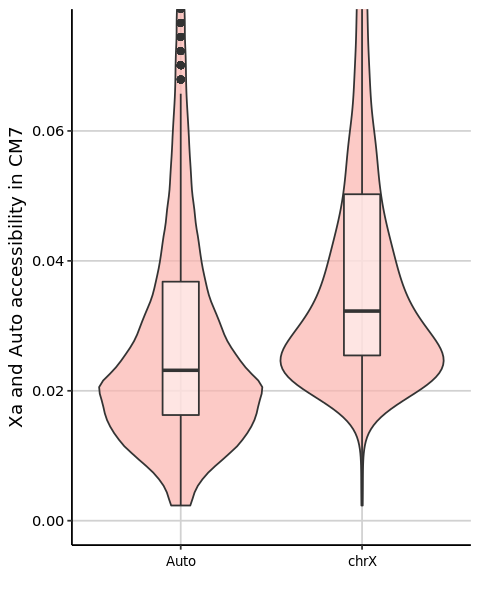

In [64]:
plot_CM7

In [38]:
options(repr.plot.width=4, repr.plot.height=5)
plot_CM3 <- ggplot(male_mESCs_CM3, aes(x=chr, y=mus_norm, fill=cell_type)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5) +
    coord_cartesian(ylim = c(0,0.075))+
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("") + 
    ylab("Xa and Auto accessibility in CM3")+

    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

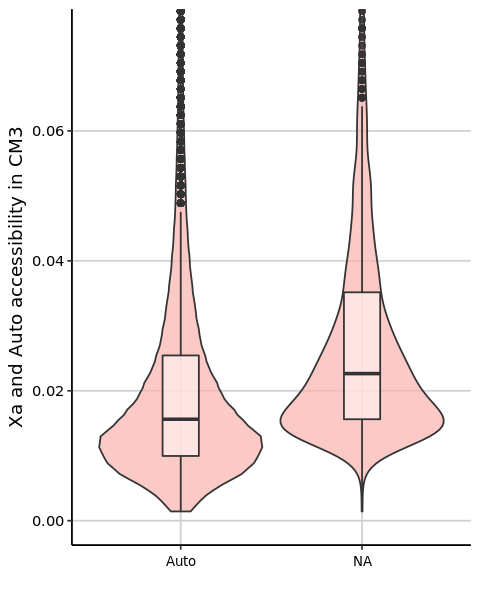

In [39]:
plot_CM3

In [66]:
test_CM7 <- pairwise.wilcox.test(male_mESCs_CM7$mus_norm, male_mESCs_CM7$chr, p.adjust.method = "bonferroni")

In [67]:
test_CM7$p.value

,Auto
chrX,2.862895e-154


In [68]:
test_CM3 <- pairwise.wilcox.test(male_mESCs_CM3$mus_norm, male_mESCs_CM3$chr, p.adjust.method = "bonferroni")

In [69]:
test_CM3$p.value

,Auto
chrX,4.313212e-241


In [40]:
ggsave("/lustre1/project/stg_00041/Irene/ATAC_analysis/Revisions/Xa_Auto_Mus_acc_mESC_CM3.pdf", width = 4, height = 5)

In [70]:
male_mESCs_CM3_median <- male_mESCs_CM3 %>%
  group_by(chr) %>%
  summarize(median=median(mus_norm))

In [71]:
male_mESCs_CM3_median

chr,median
Auto,0.01562454
chrX,0.02264670


In [72]:
male_mESCs_CM7_median <- male_mESCs_CM7 %>%
  group_by(chr) %>%
  summarize(median=median(mus_norm))

In [73]:
male_mESCs_CM7_median

chr,median
Auto,0.02315717
chrX,0.03227194


### Compare X-Cast and X-Mus accessibility levels from XX mESCs CM1 and CM2

In [20]:
head(song_mesc_atac_X)

,X,cell_type,total_reads_per_sample,region_id,chr,start,end,accessibility_genome1,accessibility_genome2,sumReads,acc_gen1_norm,acc_gen2_norm,sumReads_norm,mus_norm,cast_norm
400951,400951,CM1,4988564,400951,chrX,5435757,5435959,10,13,23,0.18270356,0.23158465,0.3791585,0.019847576,0.025725838
400952,400952,CM1,4988564,400952,chrX,5436194,5436420,6,10,16,0.11357427,0.18270356,0.2781873,0.011955754,0.019847576
400953,400953,CM1,4988564,400953,chrX,5467900,5468056,3,7,10,0.05839866,0.13130975,0.1827036,0.005995744,0.013934556
400956,400956,CM1,4988564,400956,chrX,5925868,5926228,16,11,27,0.27818733,0.19926416,0.4325859,0.031569748,0.021810839
400961,400961,CM1,4988564,400961,chrX,6081829,6082130,7,3,10,0.13130975,0.05839866,0.1827036,0.013934556,0.005995744
400962,400962,CM1,4988564,400962,chrX,6083257,6083513,13,11,24,0.23158465,0.19926416,0.3927853,0.025725838,0.021810839


In [21]:
female_mESCs_CM2_X <- subset(song_mesc_atac_X, cell_type == 'CM2')
female_mESCs_CM1_X <- subset(song_mesc_atac_X, cell_type == 'CM1')

In [29]:
options(repr.plot.width=2, repr.plot.height=5)
mus_CM1 <- ggplot(female_mESCs_CM1_X, aes(x=cell_type, y=mus_norm, fill=cell_type)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5) +
    coord_cartesian(ylim = c(0,0.075))+
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("") + 
    ylab("Mus Normalized accessibility in CM1")+

    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

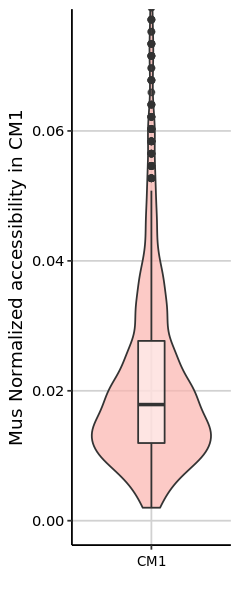

In [30]:
mus_CM1

In [31]:
ggsave("/lustre1/project/stg_00041/Irene/ATAC_analysis/Revisions/Mus_acc_mESC_CM1.pdf", width = 2, height = 5)

In [26]:
options(repr.plot.width=2, repr.plot.height=5)
cast_CM1 <- ggplot(female_mESCs_CM1_X, aes(x=cell_type, y=cast_norm, fill=cell_type)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5) +
    coord_cartesian(ylim = c(0,0.075))+
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("") + 
    ylab("Cast Normalized accessibility in CM1")+

    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

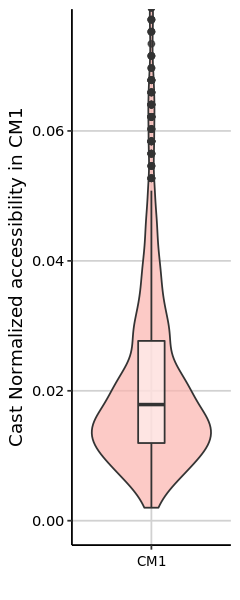

In [27]:
cast_CM1

In [28]:
ggsave("/lustre1/project/stg_00041/Irene/ATAC_analysis/Revisions/Cast_acc_mESC_CM1.pdf", width = 2, height = 5)

In [33]:
options(repr.plot.width=2, repr.plot.height=5)
cast_CM2 <- ggplot(female_mESCs_CM2_X, aes(x=cell_type, y=cast_norm, fill=cell_type)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5) +
    coord_cartesian(ylim = c(0,0.075))+
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("") + 
    ylab("Cast Normalized accessibility in CM2")+

    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

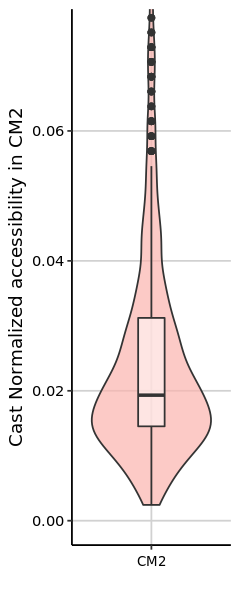

In [34]:
cast_CM2

In [35]:
ggsave("/lustre1/project/stg_00041/Irene/ATAC_analysis/Revisions/Cast_acc_mESC_CM2.pdf", width = 2, height = 5)

In [36]:
options(repr.plot.width=2, repr.plot.height=5)
mus_CM2 <- ggplot(female_mESCs_CM2_X, aes(x=cell_type, y=mus_norm, fill=cell_type)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5) +
    coord_cartesian(ylim = c(0,0.075))+
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("") + 
    ylab("Mus Normalized accessibility in CM2")+

    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

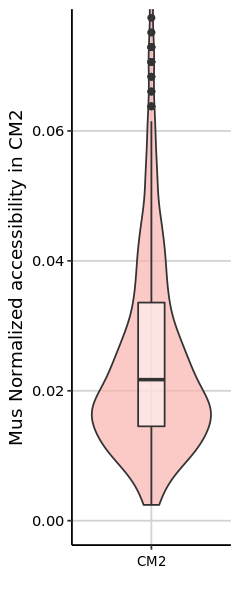

In [37]:
mus_CM2

In [38]:
ggsave("/lustre1/project/stg_00041/Irene/ATAC_analysis/Revisions/Mus_acc_mESC_CM2.pdf", width = 2, height = 5)

In [40]:
#pvalue

In [60]:
myvars <- c("mus_norm")
mus_norm_CM1 <- female_mESCs_CM1_X[myvars]

In [61]:
head(mus_norm_CM1)

,mus_norm
400951,0.019847576
400952,0.011955754
400953,0.005995744
400956,0.031569748
400961,0.013934556
400962,0.025725838


In [62]:
mus_norm_CM1$allele <- 'mus'

In [63]:
head(mus_norm_CM1)

,mus_norm,allele
400951,0.019847576,mus
400952,0.011955754,mus
400953,0.005995744,mus
400956,0.031569748,mus
400961,0.013934556,mus
400962,0.025725838,mus


In [64]:
myvars2 <- c("cast_norm")
cast_norm_CM1 <- female_mESCs_CM1_X[myvars2]

In [65]:
cast_norm_CM1$allele <- 'cast'

In [66]:
names(mus_norm_CM1)[1] <- "norm"
names(cast_norm_CM1)[1] <- "norm"

In [67]:
CM1 <- rbind(mus_norm_CM1, cast_norm_CM1)

In [68]:
head(CM1)

,norm,allele
400951,0.019847576,mus
400952,0.011955754,mus
400953,0.005995744,mus
400956,0.031569748,mus
400961,0.013934556,mus
400962,0.025725838,mus


In [58]:
test_CM2 <- pairwise.wilcox.test(CM2$norm, CM2$allele, p.adjust.method = "bonferroni")

In [59]:
test_CM2$p.value

,cast
mus,0.09112608


In [69]:
test_CM1 <- pairwise.wilcox.test(CM1$norm, CM1$allele, p.adjust.method = "bonferroni")

In [70]:
test_CM1$p.value

,cast
mus,0.3421587
